In [24]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import seaborn as sns

In [7]:
# 데이터 크롤링
url = 'http://www.statiz.co.kr/stat.php?mid=stat&re=0&ys=1982&ye=2023&se=0&te=&tm=&ty=0&qu=auto&po=0&as=&ae=&hi=&un=&pl=&da=1&o1=WAR_ALL_ADJ&o2=TPA&de=1&tr=&cv=&ml=1&sn=30&pa=0&si=&cn=&lr=1'

response = requests.get(url)

html = response.text
soup = BeautifulSoup(html, 'html.parser')
temp = soup.find_all("table")[0]

In [8]:
# 빈 데이터 프레임 만들어두기
df = pd.DataFrame(index = range(343), columns = ["순", "이름", "연도", "WAR", "-", "타석", "타수", "득점", "안타", "2루타", "3루타", "홈런", "루타", "타점", 
                                                 "도루", "도루실패", "볼넷", "사구", "고의사구", "삼진", "병살", "희생타", "희생플라이", "타율", "출루", "장타", 
                                                 "OPS", "wOBA", "wRC+", "WAR2", "--"])
df

,순,이름,연도,WAR,-,타석,타수,득점,안타,2루타,...,희생타,희생플라이,타율,출루,장타,OPS,wOBA,wRC+,WAR2,--
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
339,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
340,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
341,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# 중간에 추가 돼있는 칼럼을 제외하고 불러오기
l = 0
temp2 = temp.find_all("tr")[3]
for j in range(3,414):
    temp2 = temp.find_all("tr")[j]
    if len(temp2.find_all("td")) == 31:
        for i in range(31):
            temp3 = temp2.find_all("td")[i]
            df.iloc[l,i] = temp3.get_text()
        l += 1

In [10]:
df

,순,이름,연도,WAR,-,타석,타수,득점,안타,2루타,...,희생타,희생플라이,타율,출루,장타,OPS,wOBA,wRC+,WAR2,--
0,1,삼성,97,38.92,1511,4976,4305,722,1194,254,...,88,32,.277,.356,.462,.819,.359,124.0,38.92,
1,2,삼성,93,38.88,1667,5000,4369,613,1169,169,...,53,38,.268,.344,.408,.752,.349,126.9,38.88,
2,3,LG,94,38.57,1541,4886,4265,655,1204,205,...,54,41,.282,.358,.409,.767,.352,123.6,38.57,
3,4,현대,00,38.53,1633,5240,4478,777,1245,246,...,74,46,.278,.365,.483,.849,.369,119.2,38.53,
4,5,삼성,02,38.22,1599,5304,4648,777,1321,266,...,55,34,.284,.360,.472,.831,.362,122.7,38.22,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
338,339,롯데,02,8.23,1757,4986,4512,463,1105,206,...,49,22,.245,.305,.356,.661,.295,76.7,8.23,
339,340,쌍방울,99,7.43,1639,5054,4462,523,1108,177,...,76,33,.248,.320,.358,.678,.303,71.9,7.43,
340,341,삼미,82,6.11,867,2954,2653,302,637,117,...,33,17,.240,.304,.345,.648,.298,79.0,6.11,
341,342,KIA,15,5.51,2022,5454,4777,648,1197,223,...,79,43,.251,.326,.392,.718,.320,79.0,5.51,


In [11]:
# 삼성의 데이터만 불러오기
samsung_data = df[df['이름'].str.contains('삼성')]
samsung_data

,순,이름,연도,WAR,-,타석,타수,득점,안타,2루타,...,희생타,희생플라이,타율,출루,장타,OPS,wOBA,wRC+,WAR2,--
0,1,삼성,97,38.92,1511,4976,4305,722,1194,254,...,88,32,.277,.356,.462,.819,.359,124.0,38.92,
1,2,삼성,93,38.88,1667,5000,4369,613,1169,169,...,53,38,.268,.344,.408,.752,.349,126.9,38.88,
4,5,삼성,02,38.22,1599,5304,4648,777,1321,266,...,55,34,.284,.360,.472,.831,.362,122.7,38.22,
5,6,삼성,87,37.97,1321,4218,3731,583,1120,164,...,26,40,.300,.368,.444,.812,.378,135.1,37.97,
8,9,삼성,03,37.22,1501,5241,4564,769,1295,236,...,73,38,.284,.360,.482,.842,.369,121.3,37.22,
14,15,삼성,12,33.80,1668,5161,4436,628,1205,200,...,91,47,.272,.353,.389,.742,.344,113.9,33.80,
15,16,삼성,15,33.76,1771,5803,5019,897,1515,259,...,76,57,.302,.378,.469,.847,.373,115.3,33.76,
33,34,삼성,86,30.54,1527,4119,3617,475,997,177,...,68,31,.276,.345,.398,.744,.346,123.2,30.54,
38,39,삼성,85,29.97,1513,4250,3644,552,1005,181,...,93,42,.276,.355,.417,.772,.351,117.9,29.97,
40,41,삼성,14,29.92,1590,5152,4464,812,1345,238,...,76,43,.301,.377,.473,.850,.374,107.9,29.92,


In [12]:
samsung_data = samsung_data.drop(['순'], axis = 1)
samsung_data

,이름,연도,WAR,-,타석,타수,득점,안타,2루타,3루타,...,희생타,희생플라이,타율,출루,장타,OPS,wOBA,wRC+,WAR2,--
0,삼성,97,38.92,1511,4976,4305,722,1194,254,24,...,88,32,.277,.356,.462,.819,.359,124.0,38.92,
1,삼성,93,38.88,1667,5000,4369,613,1169,169,22,...,53,38,.268,.344,.408,.752,.349,126.9,38.88,
4,삼성,02,38.22,1599,5304,4648,777,1321,266,16,...,55,34,.284,.360,.472,.831,.362,122.7,38.22,
5,삼성,87,37.97,1321,4218,3731,583,1120,164,29,...,26,40,.300,.368,.444,.812,.378,135.1,37.97,
8,삼성,03,37.22,1501,5241,4564,769,1295,236,14,...,73,38,.284,.360,.482,.842,.369,121.3,37.22,
14,삼성,12,33.80,1668,5161,4436,628,1205,200,26,...,91,47,.272,.353,.389,.742,.344,113.9,33.80,
15,삼성,15,33.76,1771,5803,5019,897,1515,259,25,...,76,57,.302,.378,.469,.847,.373,115.3,33.76,
33,삼성,86,30.54,1527,4119,3617,475,997,177,22,...,68,31,.276,.345,.398,.744,.346,123.2,30.54,
38,삼성,85,29.97,1513,4250,3644,552,1005,181,22,...,93,42,.276,.355,.417,.772,.351,117.9,29.97,
40,삼성,14,29.92,1590,5152,4464,812,1345,238,23,...,76,43,.301,.377,.473,.850,.374,107.9,29.92,


In [14]:
samsung_data_tayul = samsung_data[['연도', '타율']]
samsung_data_tayul

,연도,타율
0,97,.277
1,93,.268
4,02,.284
5,87,.300
8,03,.284
14,12,.272
15,15,.302
33,86,.276
38,85,.276
40,14,.301


In [15]:
samsung_data_tayul = samsung_data_tayul.sort_values(by = ['연도'], ascending=[True])
samsung_data_tayul

,연도,타율
78,00,.269
63,01,.277
4,02,.284
8,03,.284
86,04,.269
103,05,.268
140,06,.255
192,07,.254
178,08,.258
97,09,.275


In [19]:
samsung_a = samsung_data_tayul.iloc[0:24]
samsung_a

,연도,타율
78,00,.269
63,01,.277
4,02,.284
8,03,.284
86,04,.269
103,05,.268
140,06,.255
192,07,.254
178,08,.258
97,09,.275


In [21]:
samsung_b = samsung_data_tayul.iloc[24:43]
samsung_b

,연도,타율
238,82,.266
150,83,.263
130,84,.270
38,85,.276
33,86,.276
5,87,.300
100,88,.278
54,89,.272
72,90,.263
44,91,.272


In [30]:
samsung_tayul = pd.concat([samsung_b, samsung_a], ignore_index= True)
samsung_tayul

,연도,타율
0,82,.266
1,83,.263
2,84,.270
3,85,.276
4,86,.276
5,87,.300
6,88,.278
7,89,.272
8,90,.263
9,91,.272


In [23]:
# 한글 사용하기 위해 폰트 불러옴
import matplotlib.pyplot as plt
plt.rc('font',family='Malgun Gothic')
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

C:\Users\user\AppData\Local\Temp\ipykernel_24016\1486874047.py:5: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('retina')


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41],
 [Text(0, 0, '82'),
  Text(1, 0, '83'),
  Text(2, 0, '84'),
  Text(3, 0, '85'),
  Text(4, 0, '86'),
  Text(5, 0, '87'),
  Text(6, 0, '88'),
  Text(7, 0, '89'),
  Text(8, 0, '90'),
  Text(9, 0, '91'),
  Text(10, 0, '92'),
  Text(11, 0, '93'),
  Text(12, 0, '94'),
  Text(13, 0, '95'),
  Text(14, 0, '96'),
  Text(15, 0, '97'),
  Text(16, 0, '98'),
  Text(17, 0, '99'),
  Text(18, 0, '00'),
  Text(19, 0, '01'),
  Text(20, 0, '02'),
  Text(21, 0, '03'),
  Text(22, 0, '04'),
  Text(23, 0, '05'),
  Text(24, 0, '06'),
  Text(25, 0, '07'),
  Text(26, 0, '08'),
  Text(27, 0, '09'),
  Text(28, 0, '10'),
  Text(29, 0, '11'),
  Text(30, 0, '12'),
  Text(31, 0, '13'),
  Text(32, 0, '14'),
  Text(33, 0, '15'),
  Text(34, 0, '16'),
  Text(35, 0, '17'),
  Text(36, 

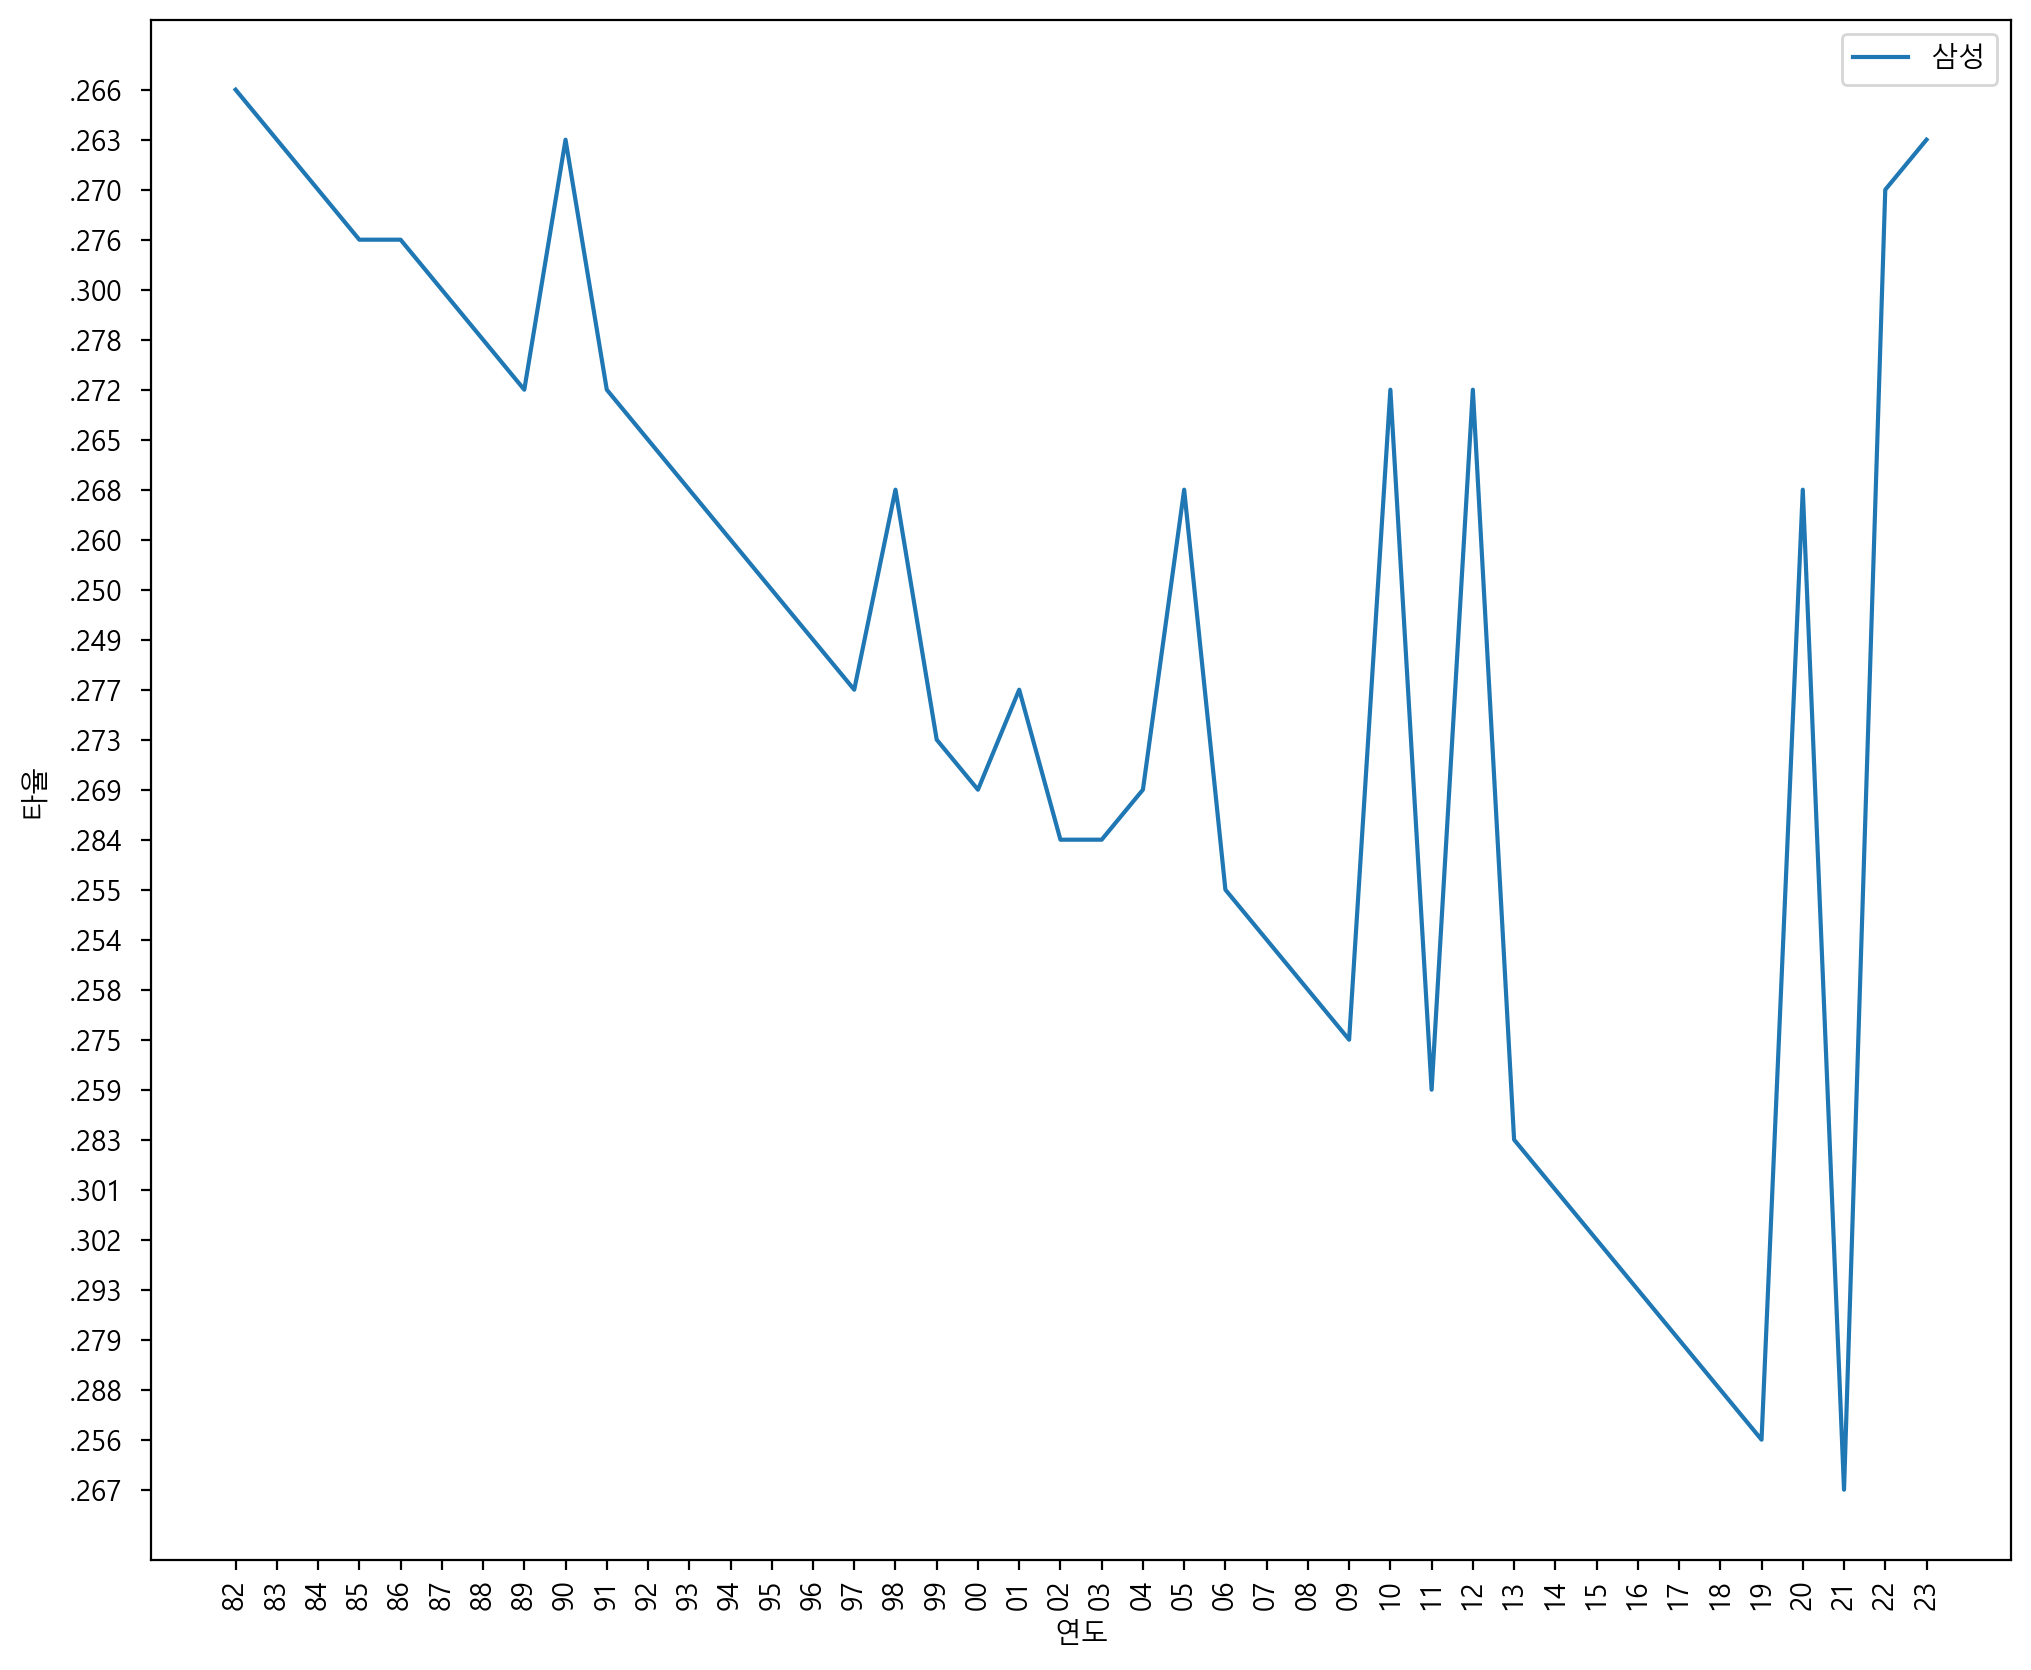

In [25]:
plt.figure(figsize = (12,10))

sns.lineplot(x='연도', y='타율', data = samsung_tayul, label = "삼성")

plt.legend()
sns.set_context('poster', font_scale = 1)

plt.xticks(rotation=90)

In [31]:
samsung_tayul.dtypes

연도    object
타율    object
dtype: object

In [32]:
samsung_tayul['타율'] = samsung_tayul['타율'].astype('float')
samsung_tayul.dtypes

연도     object
타율    float64
dtype: object

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41],
 [Text(0, 0, '82'),
  Text(1, 0, '83'),
  Text(2, 0, '84'),
  Text(3, 0, '85'),
  Text(4, 0, '86'),
  Text(5, 0, '87'),
  Text(6, 0, '88'),
  Text(7, 0, '89'),
  Text(8, 0, '90'),
  Text(9, 0, '91'),
  Text(10, 0, '92'),
  Text(11, 0, '93'),
  Text(12, 0, '94'),
  Text(13, 0, '95'),
  Text(14, 0, '96'),
  Text(15, 0, '97'),
  Text(16, 0, '98'),
  Text(17, 0, '99'),
  Text(18, 0, '00'),
  Text(19, 0, '01'),
  Text(20, 0, '02'),
  Text(21, 0, '03'),
  Text(22, 0, '04'),
  Text(23, 0, '05'),
  Text(24, 0, '06'),
  Text(25, 0, '07'),
  Text(26, 0, '08'),
  Text(27, 0, '09'),
  Text(28, 0, '10'),
  Text(29, 0, '11'),
  Text(30, 0, '12'),
  Text(31, 0, '13'),
  Text(32, 0, '14'),
  Text(33, 0, '15'),
  Text(34, 0, '16'),
  Text(35, 0, '17'),
  Text(36, 

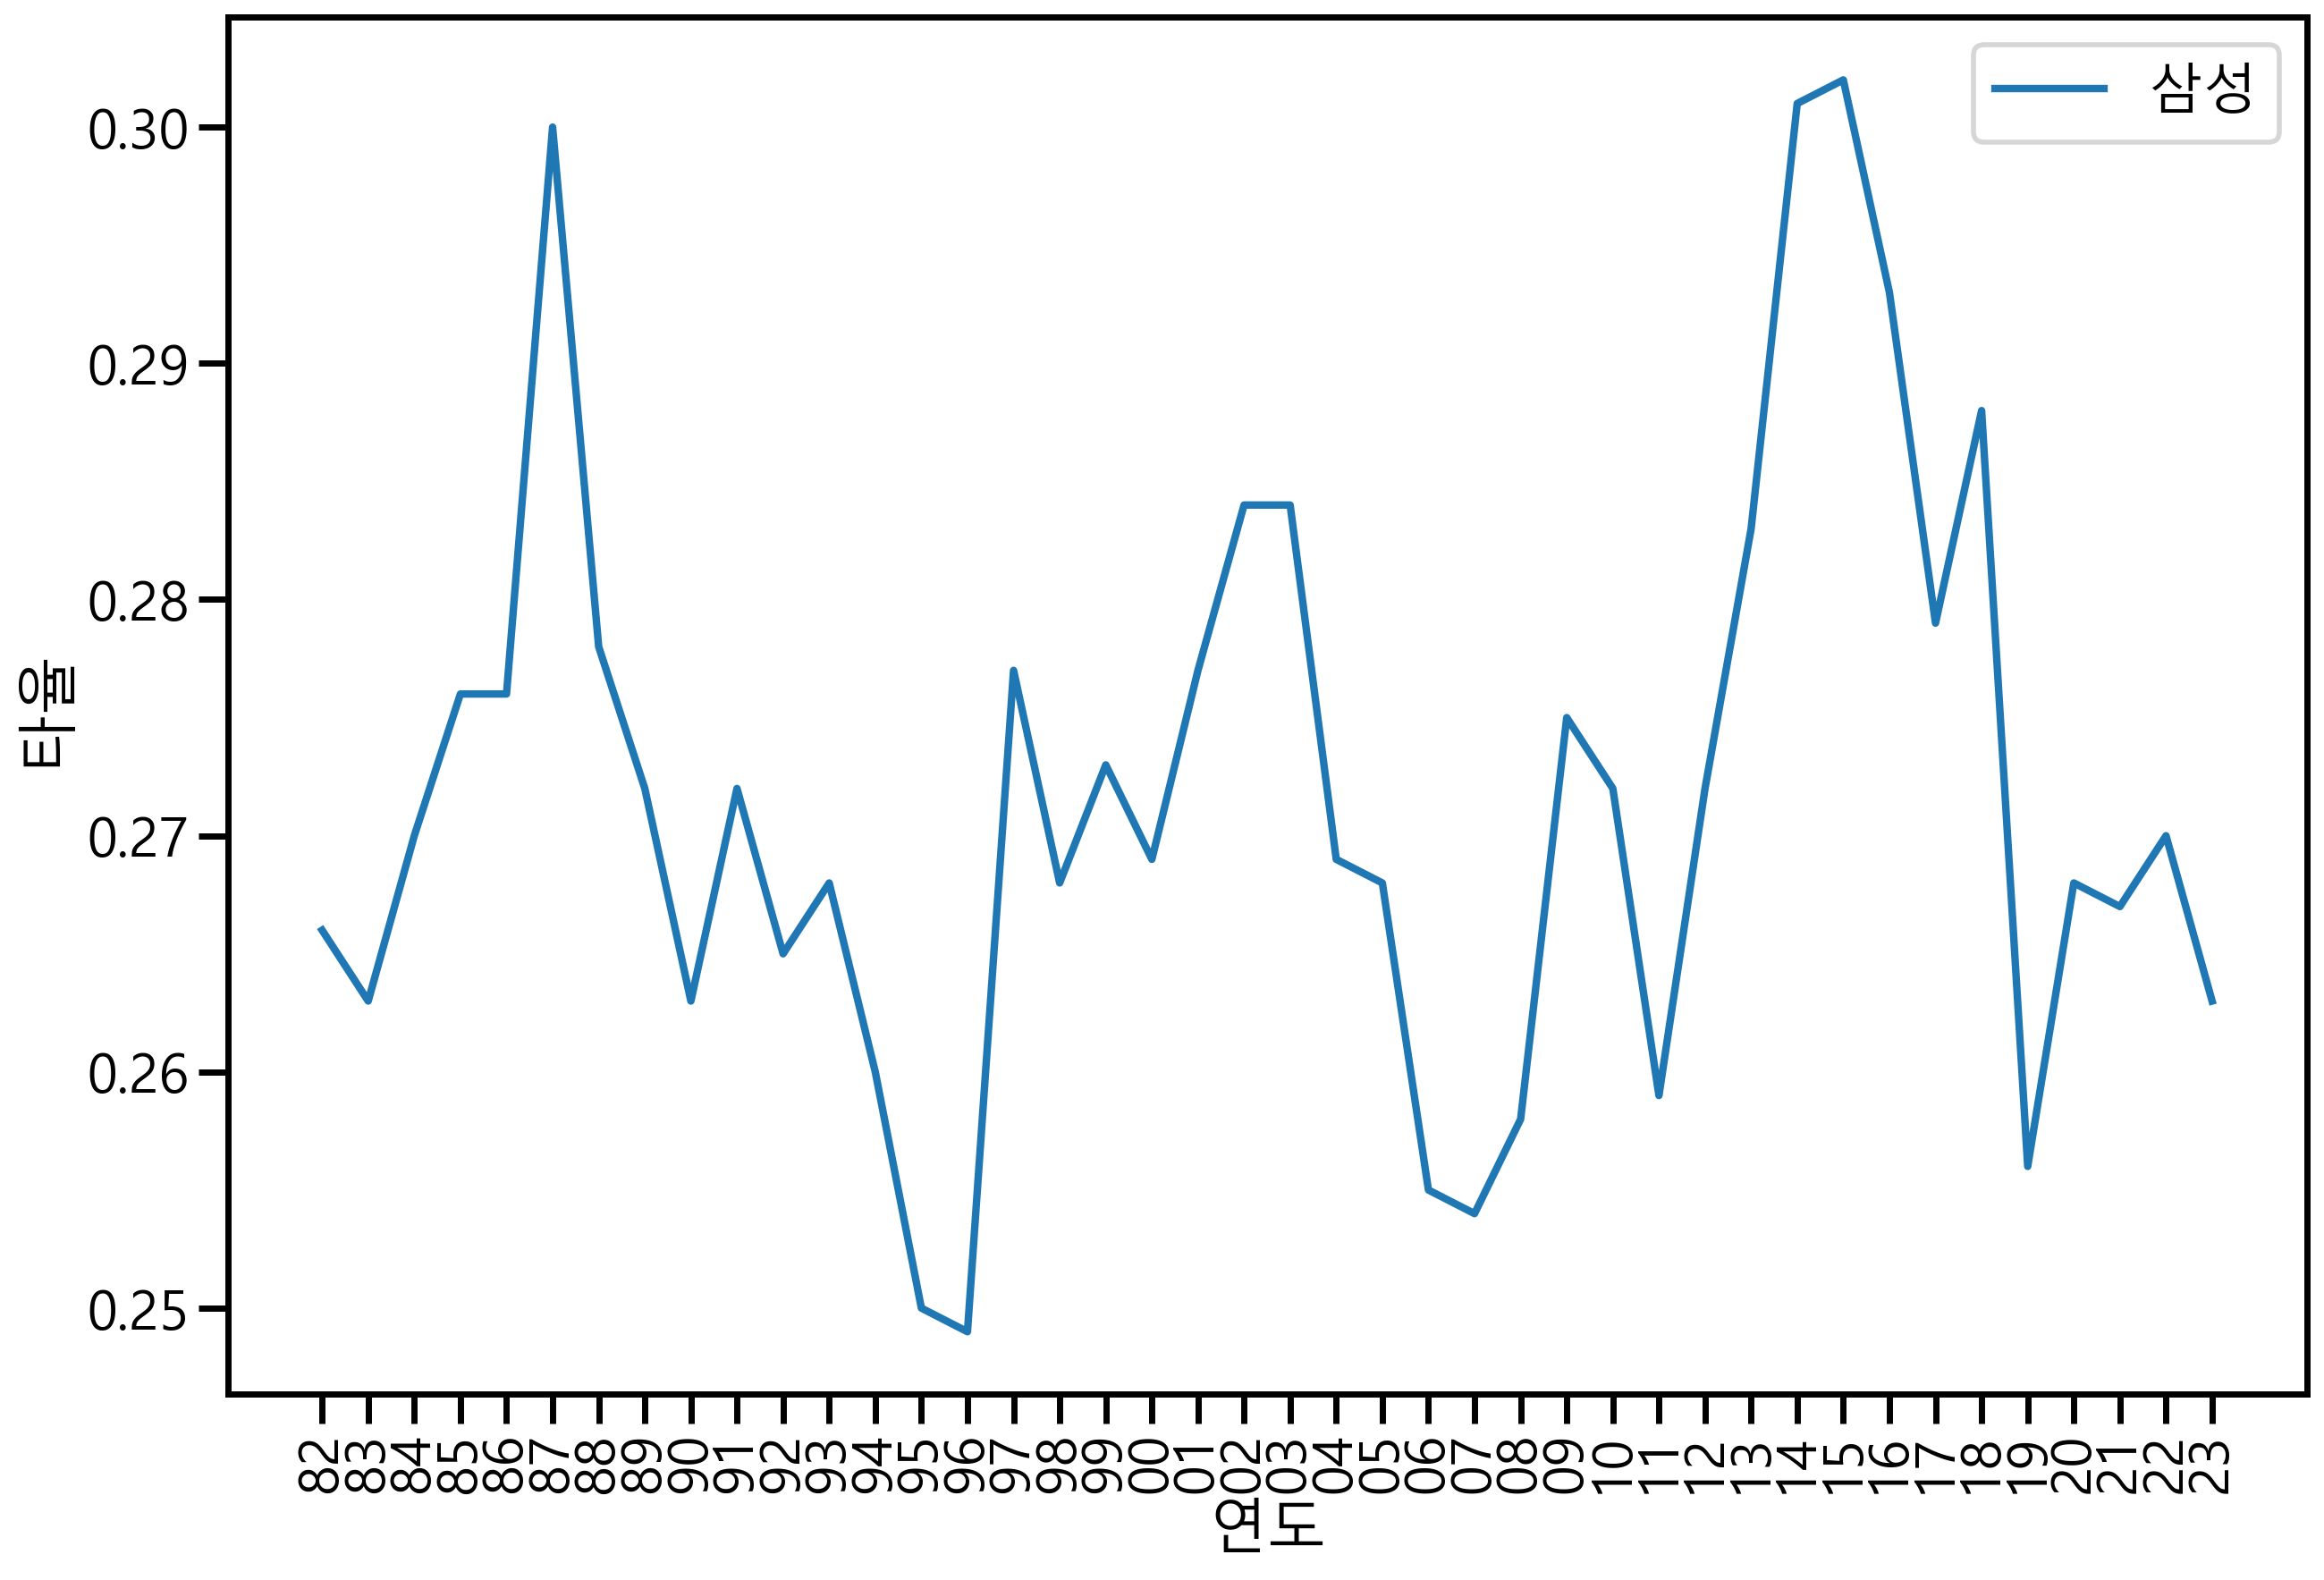

In [34]:
plt.figure(figsize = (15,10))

sns.lineplot(x='연도', y='타율', data = samsung_tayul, label = "삼성")

plt.legend()
sns.set_context('poster', font_scale = 1)

plt.xticks(rotation=90)